In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wheel<1.0,>=0.23.0 in c:\users\pc\anaconda3\lib\site-packages (from astunparse>=1.6.0->tensorflow) (0.37.1)



In [2]:
import os
import zipfile

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders
input_folder ="C:/Users/pc/Downloads/Flowers-Dataset/flowers"
splitfolders.ratio(input_folder, output="C:/Users/pc/Downloads/Flowers-Dataset/flowers/split",
   seed=42, ratio=(.8, .2), group_prefix=None, move=False) 

Copying files: 4317 files [01:46, 40.54 files/s]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [12]:
import pathlib
data_dir=pathlib.Path("C:/Users/pc/Downloads/Flowers-Dataset/flowers")
data_dir

WindowsPath('C:/Users/pc/Downloads/Flowers-Dataset/flowers')

In [13]:
len(list(data_dir.glob('*/*.jpg')))

4317

In [14]:
flower_images={
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}

In [15]:
flower_labels={
    'roses':0,
    'tulips':1,
    'dandelin':2,
    'sunflowers':3,
    'daisy':4
}


In [16]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[flower_name])
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [18]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"
                                                 ),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

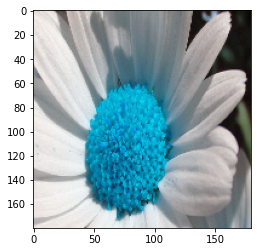

In [22]:
plt.imshow(x[1])

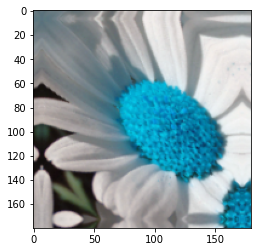

In [23]:
plt.imshow(data_augmentation(x)[1].numpy().astype("uint8"))

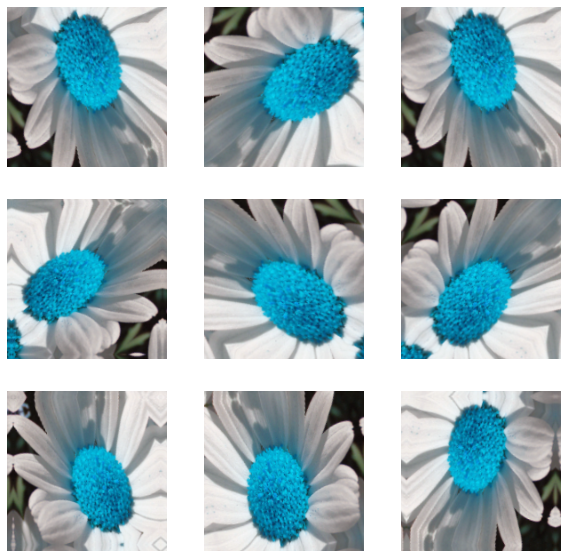

In [24]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(x)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[1].numpy().astype("uint8"))
  plt.axis("off")

In [49]:
num_classes = 5

model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 12s 365ms/step - loss: 0.0946 - accuracy: 0.9476
Epoch 2/5
18/18 [==============================] - 7s 375ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 7s 370ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 7s 378ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 6s 355ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [25]:
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 15s 761ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
18/18 [==============================] - 14s 766ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 15s 853ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 15s 810ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 14s 803ms/step - loss: 0.0000e+00 - accuracy: 1.0000


2/2 [==============================] - 3s 86ms/step
Predicted: 3


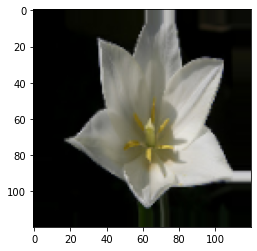

In [62]:
img = generator.next()[0]
y_pred = model_inst.model.predict([img])
predicted = np.argmax(y_pred,axis=1)[0]
plt.imshow(img[1])
print(f"Predicted: {predicted}")